# Analisis de demanda 
#### *Francisco Jose Diaz*

Este reporte presenta un analisis detallado del pronostico de la demanda para una empresa ficticia. Utilizando datos historicos se ha desarrollado un modelo para predecir la demanda futura de nuestros productos y servicios. Esta informacion es esencial para tomar decisiones informadas sobre produccion, inventario y estrategias de marketing.

Este notebook se inspira el curso Demand Analytics de Rutgers the State University of New Jersey.

### Librerias
Se importan las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import scipy.stats as st 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# datos del archivo de Excel 
df = pd.read_excel('./2.Forecasting-mini-project.xlsx', 
                   sheet_name = "Seasonality")

In [3]:
# Se cambia el nombre de las columnas para mejorar la manipulacion de datos
df.rename(columns = {
    '10-Piece Set sold units':'soldUnits', 'month year':'monthyear', '10-Piece Set sale price':'saleprice', 'Time in month': 'timemonth'}, inplace = True)

In [4]:
# Obtenemos los meses como nombre para usarlo como variable categorica
df['month'] = df['monthyear'].dt.month_name()

#### Estructura de los datos 
Los datos se componen de 4 variables y se encuentran agrupados en meses, donde las unidades vendidas son el objetivo a predecir. Las variables son:
* Unidades vendidas: esta esta representada por `soldUnits` y agrupa los 10 productos que vende la empresa. Esta medida en unidades
* Meses: agrupa los datos en meses, donde `monthyear` meses en formato fecha y `timemonth` son meses como numeros
* Precios: se refiere a la variable `saleprice`, representa el precio promedio del set de 10 productos que vende la empresa.

### Analisis exploratorio 
Primeramente hacemos una serie de tiempo para conocer el comportamiento de las unidades vendidas a traves del tiempo

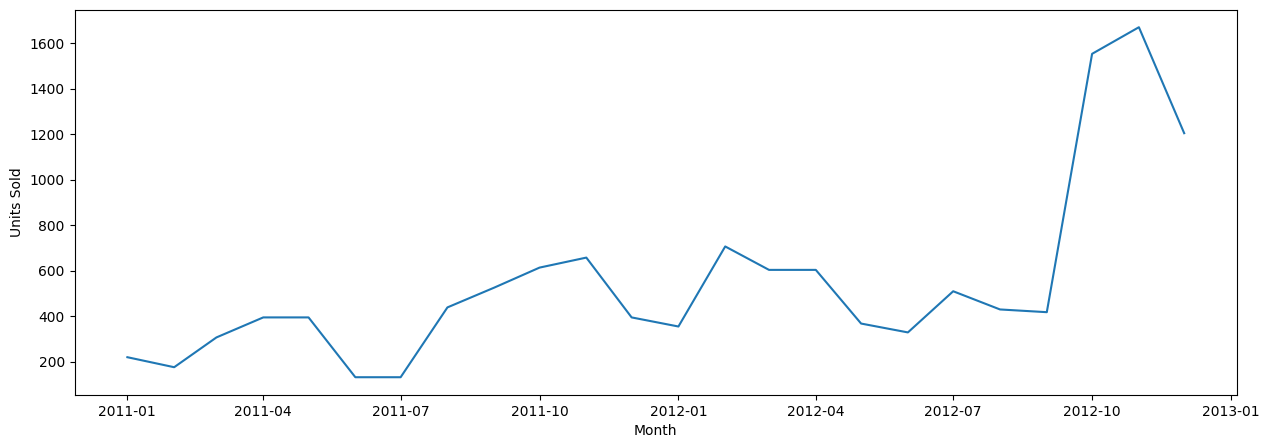

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(df['monthyear'], df['soldUnits'])
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.show()

Hacemos una comporativa entre las unidades vendidas en 2011 vs las vendidas en 2012

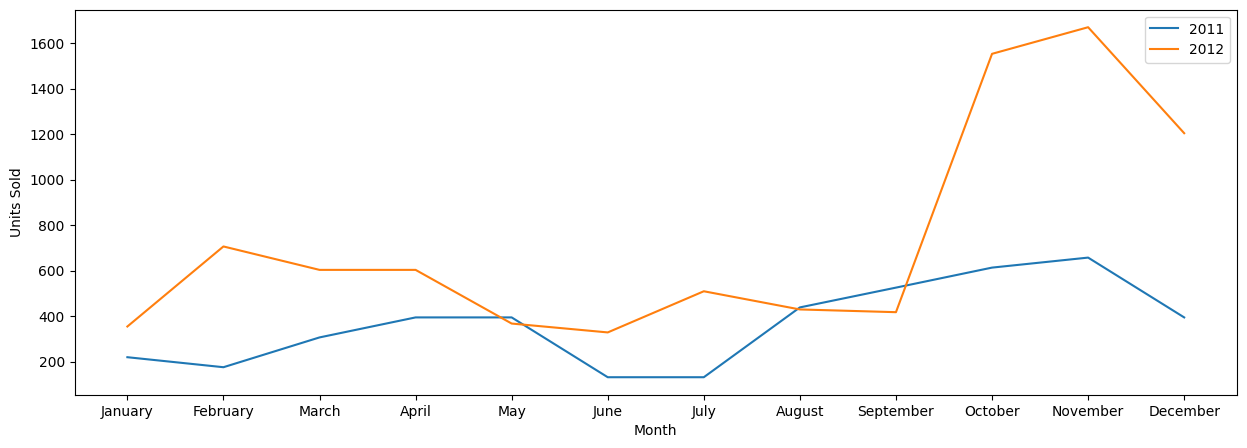

In [6]:
plt.figure(figsize=(15, 5))

# Creamos máscaras booleanas para cada año
mask_2011 = df['monthyear'].dt.year == 2011
mask_2012 = df['monthyear'].dt.year == 2012

# Trazamos los datos de cada año
plt.plot(df.loc[mask_2011, 'month'], df.loc[mask_2011, 'soldUnits'], label='2011')
plt.plot(df.loc[mask_2012, 'month'], df.loc[mask_2012, 'soldUnits'], label='2012')

# Agregar etiquetas de eje y una leyenda
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

Para comprende nuestros datos realizaremos un analisis exploratorio. En la primera visualizacion observamos en las esquinas digramas de dispercion y en la diagonal el histograma para unidades vendidas y para precio de los productos respectivamente. Se destaca que el histograma de unidades vendidas nos indica que la frecuencia de cantidad de compra es baja. Se destaca que seria conveniento noramlizar los datos de `soldUnits` y `saleprice`, para hacer una mejor comparacion en las graficas de dispersion.

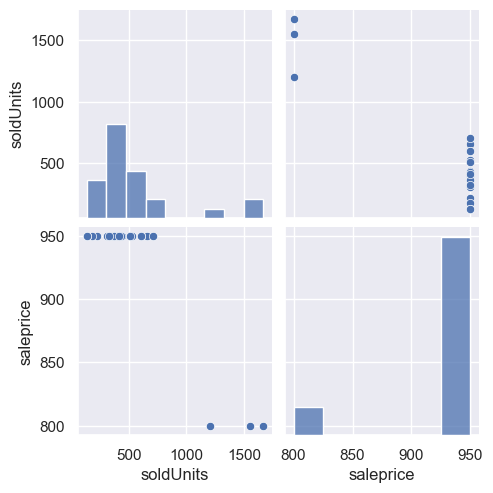

In [7]:
# Cruze de variables
sns.set()
cols = ['soldUnits', 'saleprice']
sns.pairplot(df[cols], size = 2.5)
plt.show()

### Modelo 1: Regresion lineal simple
En este modelo, utilizamos la tecnica de regresion lineal simple para predecir las unidades vendidas por meses del 2011 al 2012. La regresion lineal simple es un metodo estadistico que nos permite modelar y analizar la relacion entre dos variables cuantitativas. En nuestro caso, utilizamos esta tecnica para entender cómo el tiempo (meses) afecta las unidades vendidas y para hacer predicciones precisas sobre la demanda futura.

#### Desarrollo del modelo

In [8]:
rlm = smf.ols('soldUnits ~ timemonth', df)
model = rlm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              soldUnits   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     17.23
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           0.000417
Time:                        18:28:16   Log-Likelihood:                -170.25
No. Observations:                  24   AIC:                             344.5
Df Residuals:                      22   BIC:                             346.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.8841    128.264      0.631      0.535    -185.120     346.888
timemonth     37.2626      8.977      4.151      0.000      18.646      55.879
==============================================================================
Omnibus:                        3.334   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.868
Skew:                           0.646   Prob(JB):                        0.393
Kurtosis:                       3.446   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El resultado del Modelo 1 indica que el valor de R cuadrado es de 0.414, lo que sugiere que el modelo explica aproximadamente el 41.4% de la variabilidad en las unidades vendidas. El intercepto del modelo tiene un coeficiente de 80.8841, pero no es significativo, lo que indica que no hay evidencia suficiente para afirmar que existe una relación entre el tiempo y las unidades vendidas cuando el tiempo es igual a cero. Por otro lado, el coeficiente para la variable “time month” es de 37.26 y es significativo, lo que sugiere que existe una relación positiva entre el tiempo y las unidades vendidas. Por cada aumento de un mes en el tiempo, se espera un aumento de 37.26 unidades vendidas en promedio.

#### Analisis de residuos

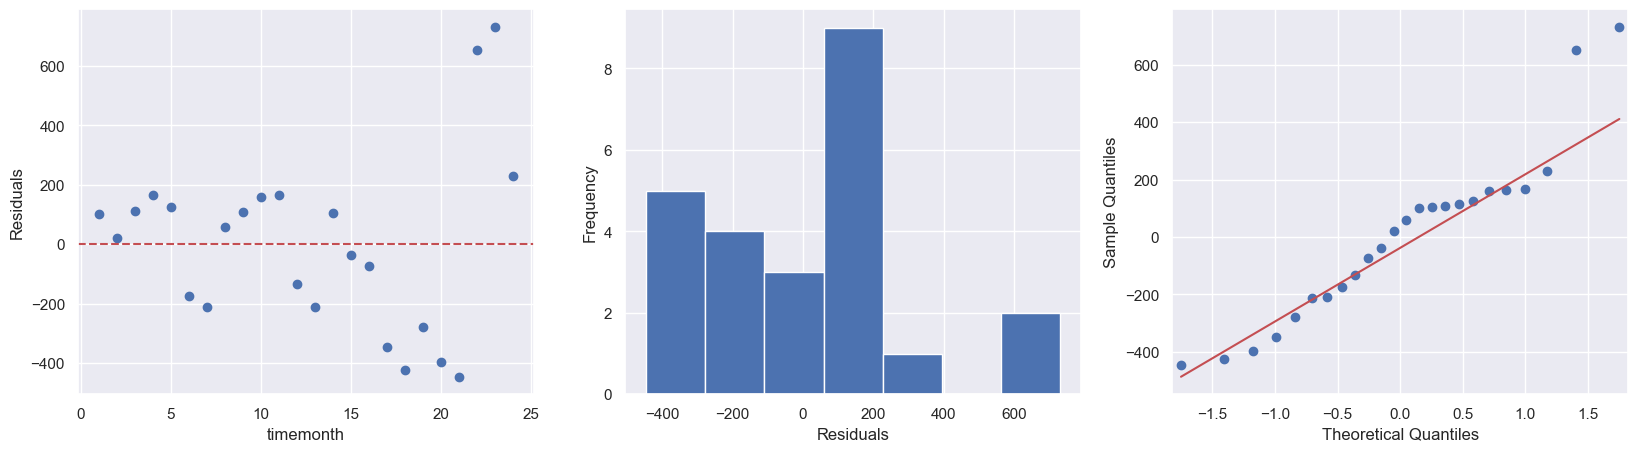

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot
residuals = model.resid
axs[0].scatter(df['timemonth'], residuals)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('timemonth')
axs[0].set_ylabel('Residuals')

# Histogram
residuals = model.resid
axs[1].hist(residuals, bins=7)
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

# Q-Q plot # Test de normalidad de residuos Q-Q Plot para evaluar la normalidad de los residuos
sm.qqplot(model.resid,line= 'q', ax=axs[2]) 

plt.show()

Al analizar los residuos del Modelo 1, encontramos que cumplen con el supuesto de linealidad, lo que sugiere que el modelo lineal es una buena opcion para representar la relación entre las variables. Sin embargo, los residuos no cumplen con los supuestos de normalidad de los residuos, independencia y homocedasticidad (varianza igual), lo que indica que puede haber problemas con la precisión de las estimaciones y las pruebas de hipotesis. En este caso, se pueden considerar otras tecnicas para corregir estos problemas, como la transformacion de datos o el uso de modelos mas complejos 

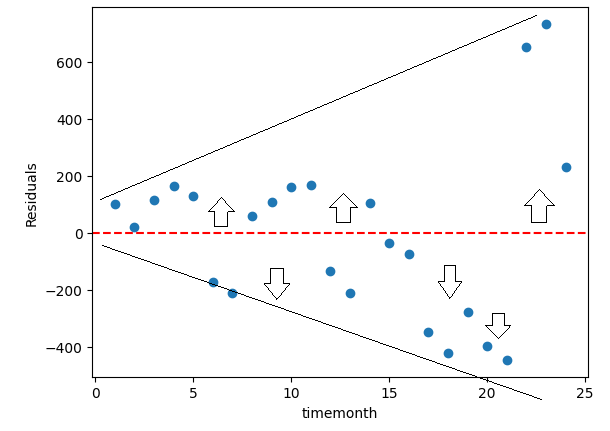


### Modelo 2: Regresion lineal multiple
En esta seccion, utilizamos la tecnica de regresion lineal multiple para predecir las unidades vendidas por meses del 2011 al 2012, teniendo en cuenta la variable precio promedio. Utilizamos esta tecnica para entender como el tiempo (meses) y el precio promedio afectan las unidades vendidas y para hacer predicciones precisas sobre la demanda futura.

In [10]:
rlm = smf.ols('soldUnits ~ timemonth + saleprice', df)
model = rlm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              soldUnits   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     57.45
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           3.05e-09
Time:                        18:28:16   Log-Likelihood:                -154.78
No. Observations:                  24   AIC:                             315.6
Df Residuals:                      21   BIC:                             319.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6076.6335    809.902      7.503      0.000    4392.350    7760.917
timemonth     12.1865      5.887      2.070      0.051      -0.056      24.429
saleprice     -6.1020      0.821     -7.430      0.000      -7.810      -4.394
==============================================================================
Omnibus:                        1.953   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.065
Skew:                          -0.030   Prob(JB):                        0.587
Kurtosis:                       1.970   Cond. No.                     2.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El Modelo 2 indica que el valor de R cuadrado es de 0.831, por lo que se este modelo tiene mayor capacidad explicativa que el modelo 1. El intercepto del modelo tiene un coeficiente de 6076.63, siendo estatisticamente significativo. Por otro lado, el coeficiente para la variable “time month” es de 12.1865 y es significativo a un nivel del 10%, lo que sugiere que existe una relación positiva entre el tiempo y las unidades vendidas. Como era es esperarse hay una relacion negativa entre la cantidad demandada y el precio de los productos, siendo este coeficiente de -6.1020 y estatisticamente significativo. 

#### Analisis de residuos

Se observa un mejor perfomance en los residuos del modelo, cumpliendo criterios de linealidad, independencia, igual varianza, pero se determina falta de normalidad de los residuos.

Aunque se tolera cierta ausencia de normalidad, en este caso el histograma de los residuos presenta falta de normalidad de los residuos. Por lo tanto se buscar metodos para mejorar el modelo y mitigar la ausencia de normalidad.  

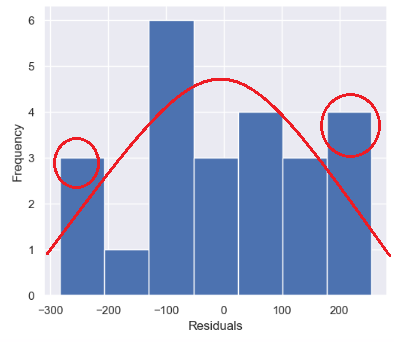

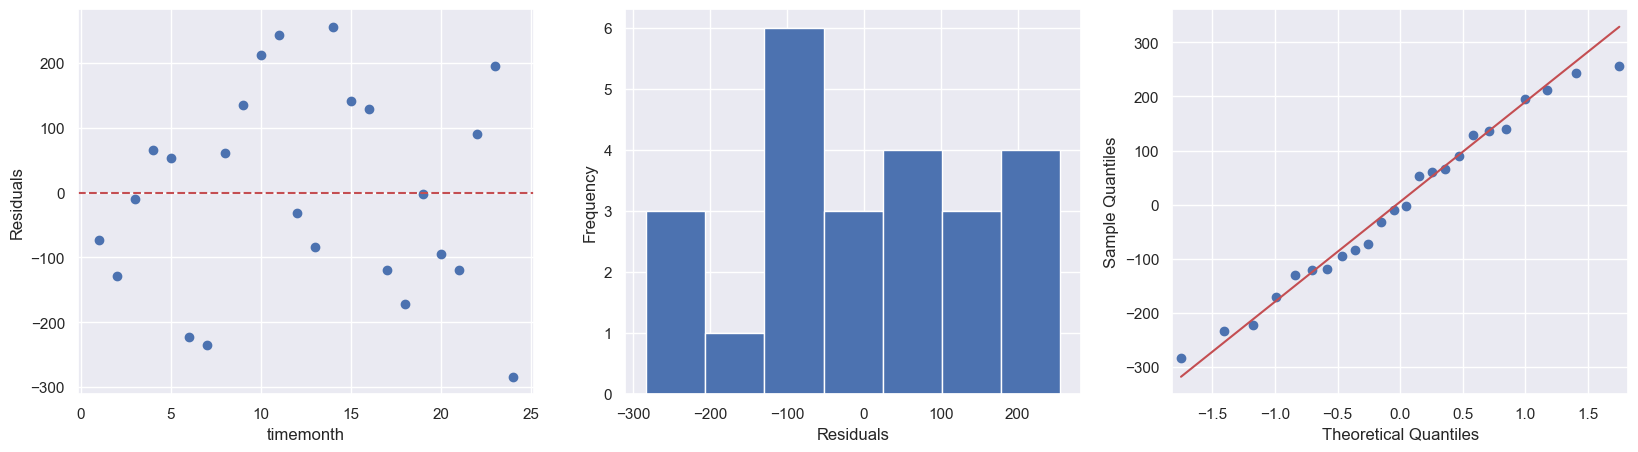

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot
residuals = model.resid
axs[0].scatter(df['timemonth'], residuals)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('timemonth')
axs[0].set_ylabel('Residuals')

# Histogram
residuals = model.resid
axs[1].hist(residuals, bins=7)
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

# Q-Q plot # Test de normalidad de residuos Q-Q Plot para evaluar la normalidad de los residuos
sm.qqplot(model.resid,line= 'q', ax=axs[2]) 

plt.show()

### Modelo 3: Seasonality Regresion lineal multiple
Se realizara un modelo de regresion lineal múltiple con estacionalidad, la cual es una tecnica estadistica que se utiliza para modelar la relacion entre una variable dependiente y múltiples variables independientes, teniendo en cuenta los efectos estacionales. Por lo tanto se usara la biblioteca `statsmodels` para ajustar un modelo de regresión lineal multiple con estacionalidad utilizando el metodo de mínimos cuadrados ordinarios (OLS). 

El siguiente código especifica que la variable dependiente es `soldUnits` y las variables independientes son `timemonth`, `month` y `saleprice`. La función `C()` se utiliza para codificar la variable categórica `month` como variables dummy, con **febrero**` como la categoría de referencia. Esto permite que el modelo tenga en cuenta los efectos estacionales al estimar los coeficientes de regresión.

In [12]:
rlm = smf.ols('soldUnits ~ timemonth + C(month, Treatment("February")) + saleprice', df)
model = rlm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              soldUnits   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     14.69
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           8.34e-05
Time:                        18:28:17   Log-Likelihood:                -141.19
No. Observations:                  24   AIC:                             310.4
Df Residuals:                      10   BIC:                             326.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     5025.6824    830.433      6.052      0.000    3175.362    6876.002
C(month, Treatment("February"))[T.April]        28.3148    134.928      0.210      0.838    -272.323     328.953
C(month, Treatment("February"))[T.August]      -96.0556    138.199     -0.695      0.503    -403.983     211.872
C(month, Treatment("February"))[T.December]   -161.3704    146.820     -1.099      0.297    -488.507     165.766
C(month, Treatment("February"))[T.January]    -139.1574    134.617     -1.034      0.326    -439.103     160.788
C(month, Treatment("February"))[T.July]       -194.7130    137.084     -1.420      0.186    -500.154     110.728
C(month, Treatment("February"))[T.June]       -270.3704    136.164     -1.986      0.075    -573.762      33.022
C(month, Treatment("February"))[T.March]        -0.8426    134.617     -0.006      0.995    -300.788     299.103
C(month, Treatment("February"))[T.May]        -104.5278    135.444     -0.772      0.458    -406.316     197.261
C(month, Treatment("February"))[T.November]    217.9722    146.153      1.491      0.167    -107.678     543.622
C(month, Treatment("February"))[T.October]     152.3148    145.675      1.046      0.320    -172.269     476.899
C(month, Treatment("February"))[T.September]   -73.3981    139.506     -0.526      0.610    -384.238     237.442
timemonth                                       14.8426      5.284      2.809      0.019       3.069      26.616
saleprice                                       -4.9516      0.845     -5.858      0.000      -6.835      -3.068
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.255
Skew:                           0.000   Prob(JB):                        0.880
Kurtosis:                       2.495   Cond. No.                     2.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El Modelo 3 indica que el valor de R cuadrado es de 0.886, lo que sugiere que el modelo explica aproximadamente el 88.6% de la variabilidad en las unidades vendidas. El intercepto del modelo tiene un coeficiente de 5025.68, siendo estatisticamente significativo. Por otro lado, el coeficiente para la variable “time month” es de 14.84 y es significativo, lo que sugiere que existe una relación positiva entre el tiempo y las unidades vendidas. Como era es esperarse hay una relacion negativa entre la cantidad demandada y el precio de los productos, siendo este coeficiente de -4.9516 y estatisticamente significativo. Vemos que de todos los meses el que es estatisticamente significativo a un nivel del 10% es el mes de Junio. 

#### Analisis de residuos

Se determina que el modelo 3 cumple los supuestos de linealidad, normalidad de los residuos, independencia y homocedasticidad (varianza igual). La linealidad, lo que significa que la relación entre las variables independientes y la variable dependiente debe ser lineal, la normalidad de los residuos, lo que significa que los residuos deben estar distribuidos normalmente, la independencia de los residuos, lo que significa que los residuos no deben estar correlacionados entre sí. Un cuarto supuesto es la homocedasticidad, lo que significa que la varianza de los residuos debe ser constante a lo largo del rango de valores ajustados por el modelo. 

Por lo tanto confiaremos en el modelo 3, es decir en la validez del modelo y en las inferencias que podemos hacer a partir de él.

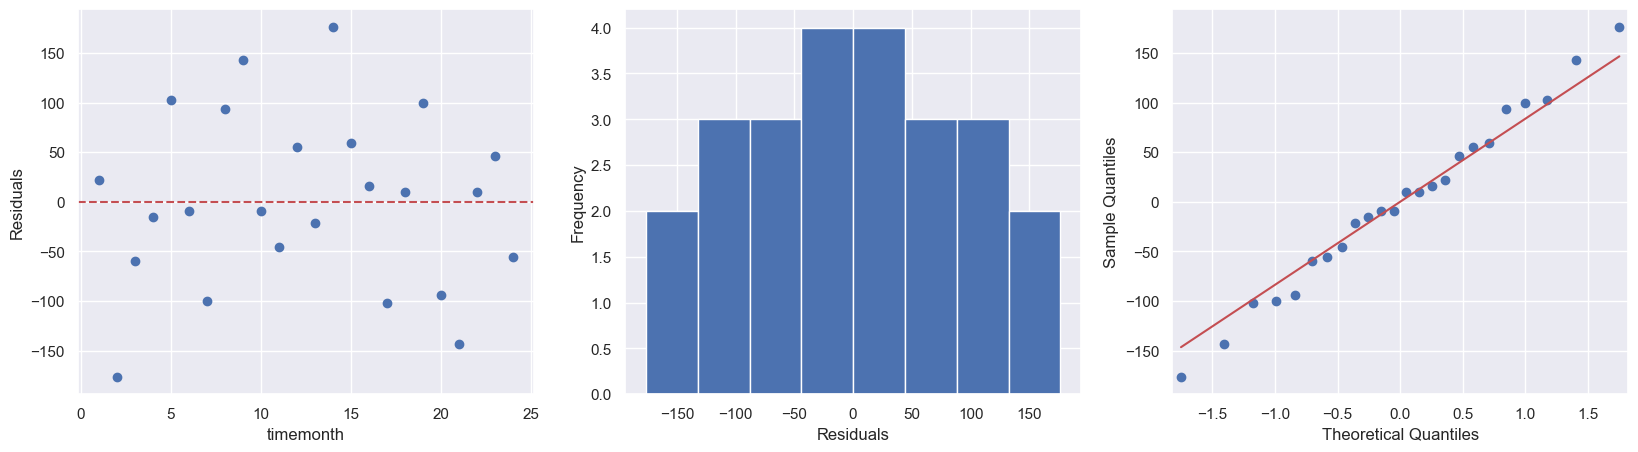

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Scatter plot
residuals = model.resid
axs[0].scatter(df['timemonth'], residuals)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('timemonth')
axs[0].set_ylabel('Residuals')

# Histogram
residuals = model.resid
axs[1].hist(residuals, bins=8)
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

# Q-Q plot # Test de normalidad de residuos Q-Q Plot para evaluar la normalidad de los residuos
sm.qqplot(model.resid,line= 'q', ax=axs[2]) 

plt.show()

### Prediccion del Modelo 3

En esta seccion se realizara la prediccion del Modelo 3, es decir la generacion de predicciones para nuevos datos utilizando el modelo ajustado. Una vez que se ha evaluado el rendimiento del modelo y se ha determinado que es adecuado, se utilizara para generar predicciones para nuevos datos. 

Se realizara y evaluara la prediccion de los primeros tres meses del año 2013. 

In [14]:
# datos del archivo de Excel 
dx = pd.read_excel('./Prediccion.xlsx', 
                   sheet_name = "Hoja1")

# Se cambia el nombre de las columnas para mejorar la manipulacion de datos
dx.rename(columns = {
    '10-Piece Set sold units':'soldUnits', 'month year':'monthyear', '10-Piece Set sale price':'saleprice', 'Time in month': 'timemonth'}, inplace = True)

# Obtenemos los meses como nombre para usarlo como variable categorica
dx['month'] = dx['monthyear'].dt.month_name()

Se genera las predicciones con el metodo `predict`. Las predicciones del modelo para los meses enero 2013, febrero 2013 y marzo 2013 son 1297, 1451 y 1465 respectivamente. El codigo es el siguiente:

In [15]:
predicted_values = model.predict(dx)
round(predicted_values,0)

0    1297.0
1    1451.0
2    1465.0
dtype: float64

Se obtiene el mean absolute error (MAE) y el mean absolute percentage error (MAPE)

In [16]:
import numpy as np
from statsmodels.tools.eval_measures import meanabs


# Calcular el MAE
mae = meanabs(dx['soldUnits'], predicted_values)

# Calcular el MAPE
mape = np.mean(np.abs((dx['soldUnits'] - predicted_values) / dx['soldUnits'])) * 100

print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

MAE: 20.22
MAPE: 1.45%


Tenemos un MAPE del 1.45% lo cual es aceptable, significa que en promedio, las predicciones del modelo se desvian de los valores reales en un 1.45%.

#### Visualizacion: Unidades vendidas y pronostico

In [17]:
# Unimos los datos
data = pd.concat([df, dx], axis=0)
data = data.reset_index(drop=True)

In [18]:
# Hacemos la prediccion
data['predictions'] = model.predict(data)

<Figure size 1500x500 with 0 Axes>

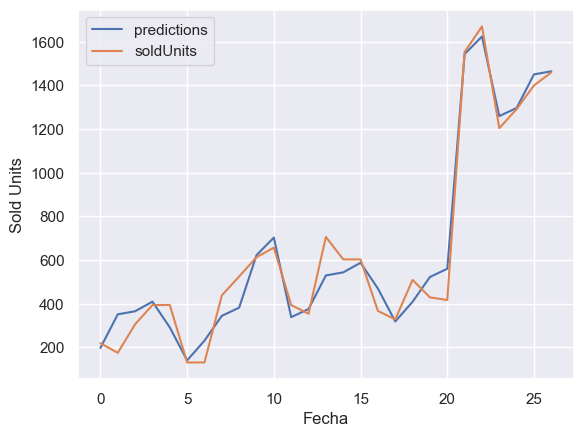

In [19]:
# hacemos la grafica
plt.figure(figsize=(15, 5))
data['monthyear'] = pd.to_datetime(data['monthyear'])
data.set_index('monthyear')
data[['predictions', 'soldUnits']].plot()
plt.xlabel('Fecha')
plt.ylabel('Sold Units')
plt.legend()
plt.show()